# Линейная регрессия

### Постановка задачи

$(\vec{x}_i, y_i)$ - обучающая выборка ($i = \overline{1, N}$), где $y_i \in \mathbb{R}$ - целевое значение и $\vec{x}_i \in \mathbb{R}^n$ - признаковое описание объекта.

Ответ алгоритма основывается на предположении (или априорном знании), что целевое значение линейно зависит от входных данных:

$$
y_i = \vec{w} \cdot \vec{x}_i + b.
$$

Здесь $\vec{w} \in \mathbb{R}^n$ и $b \in \mathbb{R}$ - параметры алгоритма.

### Метод решения

Параметры алгоритма $\vec{w} \in \mathbb{R}^n$ и $b \in \mathbb{R}$ ищутся из условия минимизации функции потерь:

$$
\hat{\vec{w}}, \hat{b} = \operatorname {argmin}_{\vec{w}, b} L(\vec{w}, b) = \operatorname {argmin}_{\vec{w}, b} \frac{1}{N} \sum_{i=1}^N (\vec{w} \cdot \vec{x}_i + b - y_i)^2.
$$



Для минимизации этой функции воспользуемся методом градиентного спуска:
$$
\vec{w} := \vec{w} - \alpha \nabla_{\vec{w}} L(\vec{w}, b) = \vec{w} - \alpha \cdot \frac{2}{N}\sum _{i=1}^N (\vec{w} \cdot \vec{x}_i + b - y_i)\vec{x}_i, \\
b := b - \alpha \nabla_b \ln L(\vec{w}, b) = b - \alpha \cdot \frac{2}{N}\sum _{i=1}^N (\vec{w} \cdot \vec{x}_i + b - y_i).
$$

Здесь $\alpha > 0$ - размер градиентного шага.

# Задача

<div>
<img src="img/Task.jpg" width="700"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pylab as plt
%matplotlib inline

np.random.seed(0) # Фиксируем генератор «случайных» чисел для воспроизводимости результата

In [2]:
df = pd.read_csv("train.tsv", header = None, sep = "\t")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,5.081360e-03,2.732210e-03,3.976420e-03,0.004540,4.731020e-03,0.005066,0.002552,0.003555,0.003674,4.089900e-03,...,0.005197,1.644370e-03,0.005083,0.004174,0.003957,0.002386,0.004375,8.412300e-04,0.000653,0.284860
1,4.174910e-03,7.084480e-03,2.123510e-03,0.000003,3.681860e-03,0.004573,0.003550,0.008086,0.006227,3.793680e-03,...,0.000264,5.655750e-03,0.006144,0.000177,0.004394,0.001403,0.002766,3.999750e-03,0.008292,0.401233
2,1.175410e-03,1.298870e-03,2.000290e-03,0.004009,3.330520e-03,0.004482,0.000404,0.000320,0.000136,3.351720e-03,...,0.003521,3.148270e-03,0.002726,0.003363,0.003507,0.001631,0.003283,2.215900e-04,0.004203,0.239423
3,5.845890e-03,5.368910e-03,6.507510e-03,0.006121,8.502420e-03,0.008948,0.002689,0.001819,0.000579,1.125160e-03,...,0.006734,5.367000e-05,0.008358,0.003522,0.001091,0.007370,0.002647,6.058580e-03,0.000045,0.491486
4,5.600000e-07,3.700000e-07,6.200000e-07,0.000002,9.700000e-07,0.000002,0.000002,0.000002,0.000002,6.800000e-07,...,0.000002,9.800000e-07,0.000002,0.000002,0.000001,0.000001,0.000001,8.000000e-07,0.000001,0.000112


In [12]:
X_train = np.array(df)
X_train = np.delete(X_train, 100, 1) # Удаляем последний столбец в X_train

x_0 = np.ones(X_train.shape[0])
x_0 = x_0[np.newaxis, :].T # Транспонирование numpy не работает для 1-D массивов => приходится выкручиваться
X_train = np.hstack((x_0, X_train)) # Добавляем к матрице X_train единичный стобец на первое место

Y_train = np.array(df[100])

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape, "\n")

print("X_train: \n", X_train, "\n")
print("Y_train: \n", Y_train)

X_train shape: (10000, 101)
Y_train shape: (10000,) 

X_train: 
 [[1.000000e+00 5.081360e-03 2.732210e-03 ... 4.375370e-03 8.412300e-04
  6.529100e-04]
 [1.000000e+00 4.174910e-03 7.084480e-03 ... 2.766070e-03 3.999750e-03
  8.292280e-03]
 [1.000000e+00 1.175410e-03 1.298870e-03 ... 3.283010e-03 2.215900e-04
  4.203090e-03]
 ...
 [1.000000e+00 2.114960e-03 1.112993e-02 ... 1.636344e-02 1.119067e-02
  2.249600e-03]
 [1.000000e+00 4.023160e-03 2.407500e-04 ... 4.102650e-03 4.440250e-03
  5.700450e-03]
 [1.000000e+00 9.003000e-04 6.132900e-03 ... 5.207050e-03 4.707980e-03
  2.040500e-03]] 

Y_train: 
 [0.28486006 0.40123294 0.23942324 ... 0.87266402 0.30165096 0.32174571]


In [29]:
w = np.sqrt(2 / 102) * np.random.normal(loc=0.0, scale=1.0, size = X_train.shape[1])
# Инициализация весов значениями распределенными по нормальному закону с матожиданием 0 и дисперсией 1.
# Множитель (2 / (out_size + in_size))**(0.5) для лучшего старта обучения

print("w shape:", w.shape)
print("w: \n", w)

w shape: (101,)
w: 
 [ 0.15398314  0.09175528  0.08963634 -0.22641913 -0.00340634 -0.103345
  0.03919728 -0.0137438   0.12745054  0.04441943  0.11010794 -0.06531174
 -0.13224893 -0.05741844 -0.00238333  0.05309186  0.31636653 -0.00591718
 -0.13385907 -0.04844714 -0.06491642  0.06742089 -0.21575474  0.00885845
  0.0219153   0.03251185 -0.08364098 -0.03331571 -0.19940841 -0.0690786
 -0.07601581  0.05825866 -0.16189792  0.10938961  0.20926969 -0.28985588
  0.05968816  0.09478608 -0.08925904 -0.05562918 -0.018607   -0.04169906
 -0.04327047 -0.23468748  0.16135869  0.15117684 -0.11389378 -0.20534048
  0.07296368 -0.08062644  0.01987742 -0.04471492  0.09683479  0.09728434
 -0.10160396 -0.1937097  -0.22165571  0.08547021 -0.16647359 -0.07096848
 -0.08350067 -0.00736089 -0.2711334   0.02643429  0.07335942  0.01238157
 -0.04353277  0.01363875  0.05587767 -0.38824064  0.27388251  0.05462399
 -0.09135547 -0.05474442  0.06913768 -0.0162578  -0.2843527   0.28908682
 -0.01547879  0.14285275 -0.09690

In [30]:
# Квадратичная функция потерь (функция штрафа за неправильное предсказание)
def L(x, y, w):
    return (x.T@w - y)**2  # Возвращает число


# Градиент функции потерь
def grad_L(x, y, w):
    ans = np.full(10, 2)
    ans = ans[np.newaxis, :].T
    return 2*np.full(101, np.dot(x.T, w) - y)*x

In [31]:
%%time

loss = []

for epoch in tqdm.notebook.tqdm(range(100), desc = 'Progress bar'):
    for i in range(X_train.shape[0]):
        w -= 0.01 * grad_L(X_train[i], Y_train[i], w)
        if i % 1000 == 0:
            loss.append(L(X_train[i], Y_train[i], w))

Progress bar:   0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 21.4 s, sys: 4.16 s, total: 25.6 s
Wall time: 20.3 s


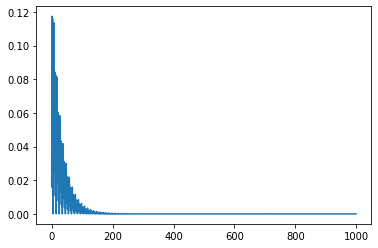

In [35]:
plt.plot(loss)

In [36]:
# Посчитаем среднюю ошибку

def MSE(X, Y, W):
    l = []
    for i in range(X.shape[0]):
        l.append(L(X[i], Y[i], w))
    
    return np.array(l).mean()
    
print("MSE:", MSE(X_train, Y_train, w))

MSE: 1.336246040326112e-05


## Аналитическое решение

Для задачи восстановления весов $W$ линейной модели есть аналитическое решение:
$$
W = (X^TX)^{-1}X^TY
$$

In [37]:
X = X_train
Y = Y_train

W = np.linalg.inv(X.T@X)@X.T@Y
print("W shape:", W.shape)

print("W: \n", W) # Очень простая зависимость

W shape: (101,)
W: 
 [1.73472348e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.

In [38]:
# Посчитаем среднюю ошибку

l = []
for i in range(X.shape[0]):
    l.append(L(X[i], Y[i], W))
    
print("MSE:", np.array(l).mean())

MSE: 9.992228806659213e-30
